# * Customer Churn Analysis

# Problem Statement:

# Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

# Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

# Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

# You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\New folder\Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#Lets check the shape of dataset
df.shape

(7043, 21)

So , here we have 7043 rows and 21 columns

# Data is Duplicated ? 

In [4]:
df.duplicated().sum()

0

so, here we have 0 Duplicated Data

In [5]:
#Lets check the data type of dataset
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

so here we have

float64 type - MonthlyCharges columns

int64 type -  tenure , SeniorCitizen columns

Oject type -  Than All columns are object columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# DATA CLEANING

'TotalCharges' is a numerical data, but it listed as object, lets convert it

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
# drop null value
df = df.dropna(axis=0, how='any')

# drop customer id
df = df.drop(['customerID'], axis=1)

In [10]:
# check categorical data 
for col in df:
    print(col , "\n" , df[col].unique() , "\n")

gender 
 ['Female' 'Male'] 

SeniorCitizen 
 [0 1] 

Partner 
 ['Yes' 'No'] 

Dependents 
 ['No' 'Yes'] 

tenure 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39] 

PhoneService 
 ['No' 'Yes'] 

MultipleLines 
 ['No phone service' 'No' 'Yes'] 

InternetService 
 ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity 
 ['No' 'Yes' 'No internet service'] 

OnlineBackup 
 ['Yes' 'No' 'No internet service'] 

DeviceProtection 
 ['No' 'Yes' 'No internet service'] 

TechSupport 
 ['No' 'Yes' 'No internet service'] 

StreamingTV 
 ['No' 'Yes' 'No internet service'] 

StreamingMovies 
 ['No' 'Yes' 'No internet service'] 

Contract 
 ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling 
 ['Yes' 'No'] 

PaymentMethod 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges 
 [29

# value count Function

In [11]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [12]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [13]:
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [14]:
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [15]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [16]:
df['StreamingTV'].value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [17]:
df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

# EXPLORATORY DATA ANALYSIS (EDA)

# essential function

In [18]:
# print average
def printAvg(df, col):
    print("Average: " + str(df[col].mean()))

In [19]:
# countplot figure
def fig_countplot(df, col, sort):
    fig = plt.figure(figsize=(7, 4))
    fig.set_facecolor('white')
    if (sort): ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    else: ax = sns.countplot(data=df, x=col, palette='Set2')
    ax.set_title(col, fontsize=20)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=14)
    plt.show()

In [20]:
# kdeplot figure
def fig_kdeplot(df, col):
    fig = plt.figure(figsize=(9,5))
    fig.set_facecolor('white')
    ax = df[col].hist(bins=10, density=False, alpha=0.5, color='purple')
    ax = sns.kdeplot(data=df, x=col, shade=False, alpha=0.9, linewidth=2)
    ax.set_title(col, fontsize=20)
    plt.show()

In [21]:
# kdeplot figure yn
def fig_kdeplot_yn(df, col):
    fig = plt.figure(figsize=(9, 5))
    fig.set_facecolor('white')

    ax = sns.kdeplot(data=df, x=(df[col][df['Churn'] == 'Yes']), shade=True, alpha=0.2, linewidth=2, color='red')
    ax = sns.kdeplot(data=df, x=(df[col][df['Churn'] == 'No']), shade=True, alpha=0.2, linewidth=2, color='blue')
    
    ax.set_title(col, fontsize=20)
    ax.legend(['Churn', 'Not Churn'], loc='upper right')
    plt.show()

In [22]:
def fig_countplot_yn(df, col):
    fig = plt.figure(figsize=(9,5))
    fig.set_facecolor('white')
    ax = sns.countplot(data=df, x=col, hue='Churn', palette='flare')
    
    # percentage
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")

    plt.show()

In [23]:
# boxplot figure
def fig_boxplot(df,col):
    fig = plt.figure(figsize=(12,9))
    fig.set_facecolor('white')
    ax = sns.boxplot(df[col])
    ax.set_title(col, fontsize=20)
    plt.show()

In [24]:
# print percentage of categorical data
def print_percentage(df, col):
    print(df[col].value_counts()/df[col].count()*100)

In [25]:
# print percentage of churn vs not churn 
def print_percentage_yn(df, col):
    print("Churn: ")
    print((df[col][df['Churn'] == 'Yes'].value_counts()/df[col].count())*100)
    print("Not Churn: ")
    print((df[col][df['Churn'] == 'No'].value_counts()/df[col].count())*100)

In [26]:
# pie chart
def fig_piechart(df, col):
    fig = plt.figure(figsize=(5,5))
    fig.set_facecolor('white')
    colors = ['#ffcc99', '#ff6666', '#99ff99', '#66b3ff', '#c2c2f0','#ffb3e6']
    ax = (df[col].value_counts()*100.0/len(df)).plot.pie(legend=False, autopct='%1.1f%%', fontsize=12, colors=colors)
    ax.set_title(col)
    plt.show()

In [27]:
def fig_sub_pie(df, col):
    fig, ax = plt.subplots(1, 2, sharey=False, figsize=(9, 5))
    fig.set_facecolor('white')

    # pieplot
    fig.set_facecolor('white')
    colors = ['#ffcc99', '#ff6666', '#99ff99', '#66b3ff', '#c2c2f0','#ffb3e6']
    (df[col].value_counts()*100.0/len(df)).plot.pie(legend=False, autopct='%1.1f%%', fontsize=12, colors=colors, ax=ax[0])
    
    # countplot
    sns.countplot(data=df, x=col, hue='Churn', palette='flare', ax=ax[1])
    # percentage on countplot
    bars = ax[1].patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax[1].text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
        ax[1].text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")

    
    plt.tight_layout()
    plt.show()

In [28]:
def fig_sub_count(df, col):
# for col in demographic:
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9, 5))
    fig.set_facecolor('white')
    
    sns.countplot(data=df, x=col, palette='Accent', ax=ax[0])
    sns.countplot(data=df, x=col, hue='Churn', palette='flare', ax=ax[1])
    
    # percentage
    for i in range(2):
        bars = ax[i].patches
        half = int(len(bars)/2)
        left_bars = bars[:half]
        right_bars = bars[half:]

        for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r

            ax[i].text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.1%}'.format(height_l/total), ha="center")
            ax[i].text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.1%}'.format(height_r/total), ha="center")
    
    plt.show()
    # print_percentage(df, col)
    # print_percentage_yn(df, col)

In [29]:
def fig_scatterplot(df, col1, col2):
    colors = np.random.rand(len(df[col1]))
    fig = df[[col1, col2]].plot.scatter(x=col1, y=col2, c='purple', alpha=0.3)
    fig.set_facecolor('white')
    plt.show()

# Analysis on Churn (target)

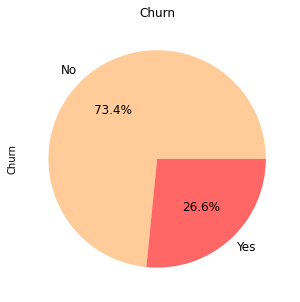

In [30]:
fig_piechart(df, 'Churn')

73,4 customer not churned. The dataset is skewed, but its normal since on a business, we expect there's more customer who stayed. However, this skewness can lead to false negatives. we will be handling this skewness in preprocessing step after we do EDA on other features.

# to make it simpler, I divided the feature to category as:

# * charges : ['tenure', 'MonthlyCharges', 'TotalCharges']
# * demographic : ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
# * phone : ['PhoneService', 'MultipleLines']
# * internet : ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# * payment : ['Contract', 'PaperlessBilling', 'PaymentMethod']

In [31]:
charges = ['tenure', 'MonthlyCharges', 'TotalCharges']
demographic = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
phone = ['PhoneService', 'MultipleLines']
internet = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
payment = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Analysis on charges (tenure, MonthlyCharges, TotalCharges)

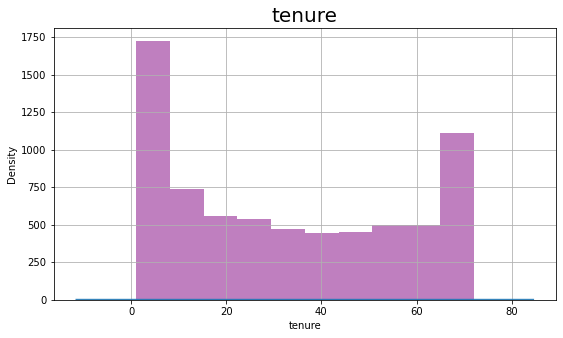

Average: 32.421786120591584


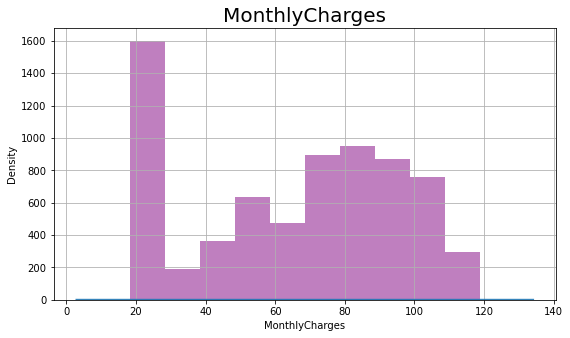

Average: 64.79820819112632


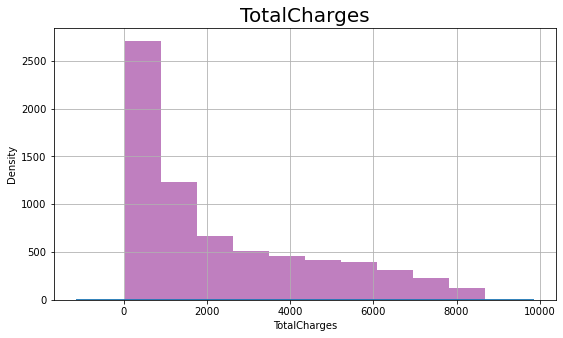

Average: 2283.3004408418697


In [32]:
for col in charges:
    fig_kdeplot(df, col)
    printAvg(df, col)

* tenure distribution skewed, with most density at 10-15 and 60-70.
* MonthlyCharges distribution also skewed, with most density at 20-25.
* TotalCharge density most dense at 0-1000 and tend to lower as the TotalCharges higher.

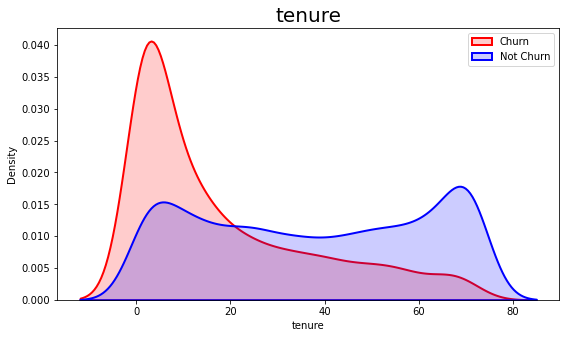

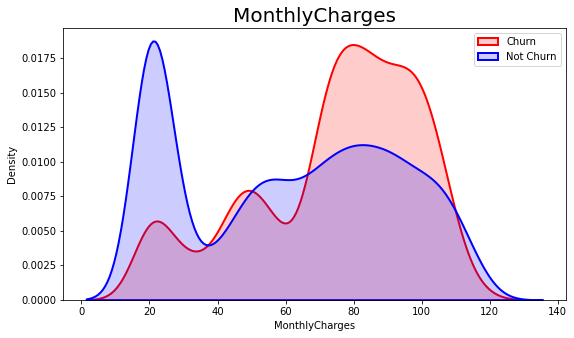

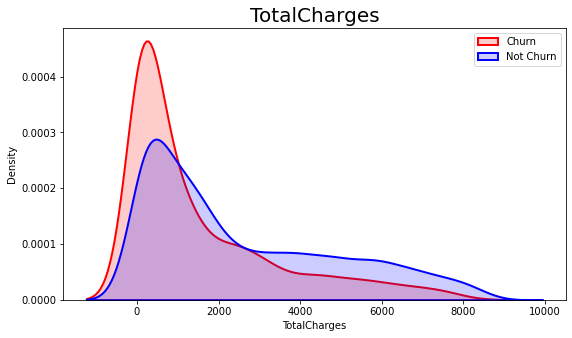

In [33]:
for col in charges:
    fig_kdeplot_yn(df, col)

* customer who churned tend to have tenure on 0-20
* customer who churned tend to have higher MonthlyCharges, while customer who not churned tend to have lower Monthly Charges
* there's no pattern on TotalCharges. both customer who churn and not churn tend to have lower TotalCharges between 0-2000. There's slightly higher density on higher TotalCharges on customer who not churn, but still mostly on lower TotalCharges.

Lets see the relationship between MonthlyCharges and TotalCharges

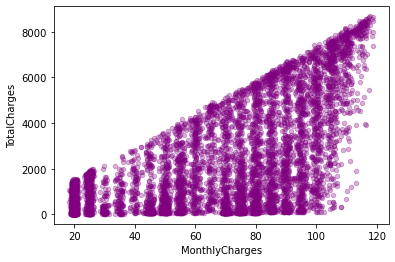

In [34]:
fig_scatterplot(df, 'MonthlyCharges', 'TotalCharges')

# Analysis on demographic (gender, SeniorCitizen, Partner, Dependents)

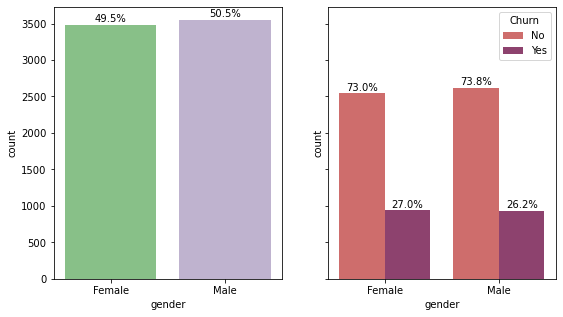

In [35]:
fig_sub_count(df, 'gender')

female and male customer count balanced and Churn ratio also similar, this mean there's no majority gender on customer and one gender don't tend to Churn.

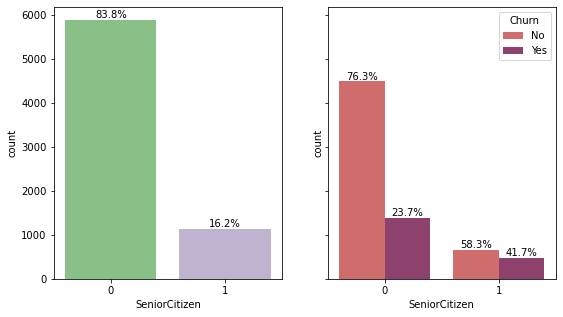

In [36]:
fig_sub_count(df, 'SeniorCitizen')

most of customer wasn't a senior citizen. however, senior citizen has more churn rate then customer who are not a senior citizen.

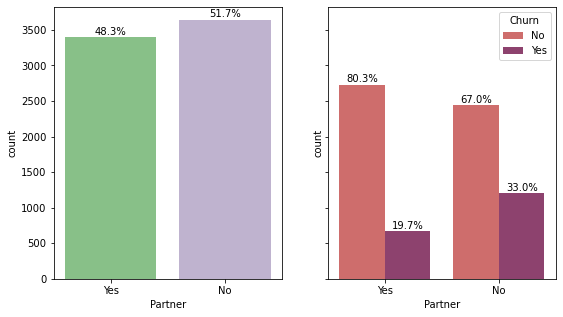

In [37]:
fig_sub_count(df, 'Partner')

customer who has and doesn't has partner count is balanced. customer who don't has partner show slightly higher churn rate.

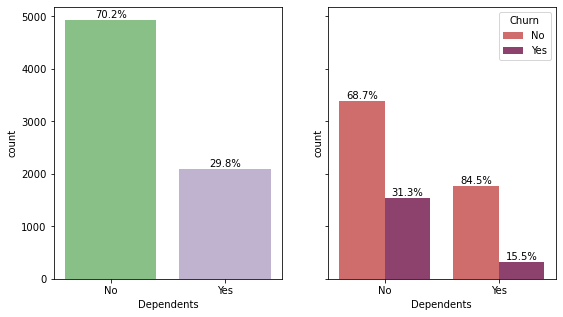

In [38]:
fig_sub_count(df, 'Dependents')


most customer doesn't have dependents. customer who has dependents shows lower churn rate the customer who don't

# Analysis on phone (PhoneService, MultipleLines)

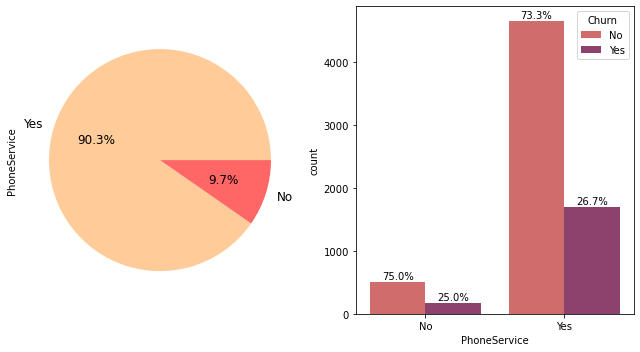

In [39]:
fig_sub_pie(df, 'PhoneService')

majority of customer have PhoneService, there's no significant churn ratio deferences between customer who have Phone Service or not

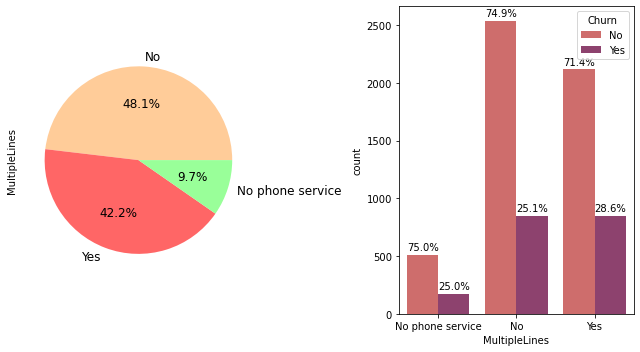

In [40]:
fig_sub_pie(df, 'MultipleLines')

out of 90,3% customer who have Phone Service, half of them used MultipleLines and others don't. There's also ni significant churn ratio differences between cutomer who used Multiple Lines and not

# Analysis on internet (InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies)

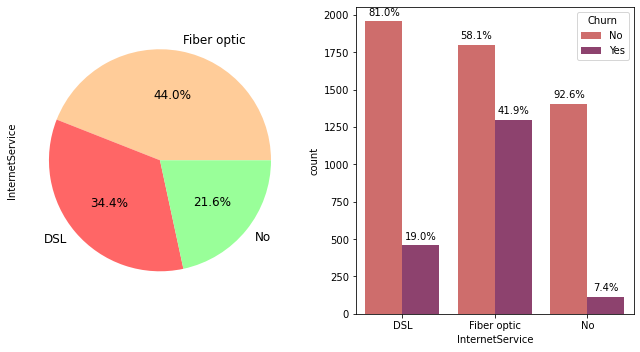

In [41]:
fig_sub_pie(df, 'InternetService')

customer who used fiber optic shows more churn rate than the other two, with customer who didn't use internet service has the lowest churn rate

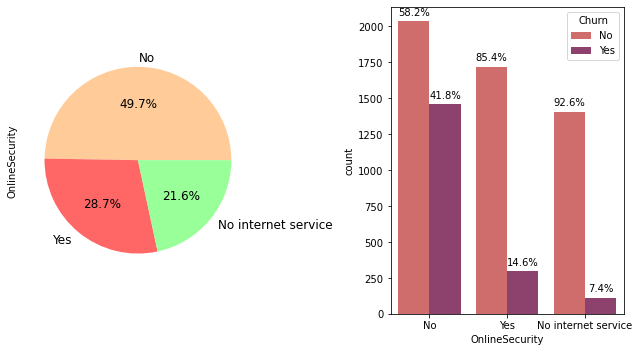

In [42]:
fig_sub_pie(df, 'OnlineSecurity')

half of the customer don't used OnlineSecurity, and has the highest churn rate.

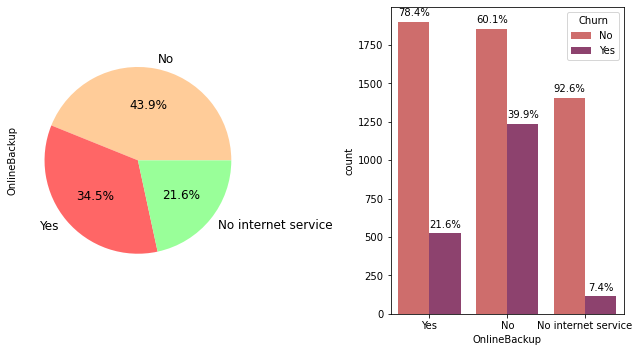

In [43]:
fig_sub_pie(df, 'OnlineBackup')

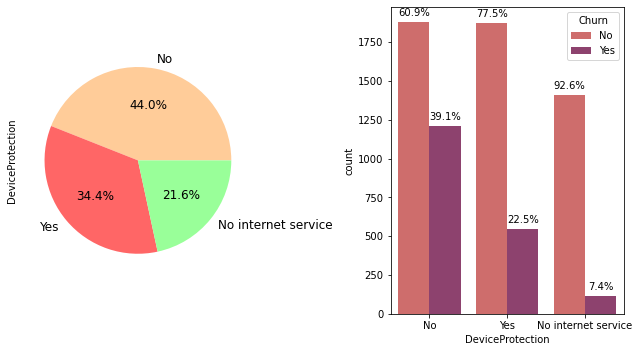

In [44]:
fig_sub_pie(df, 'DeviceProtection')

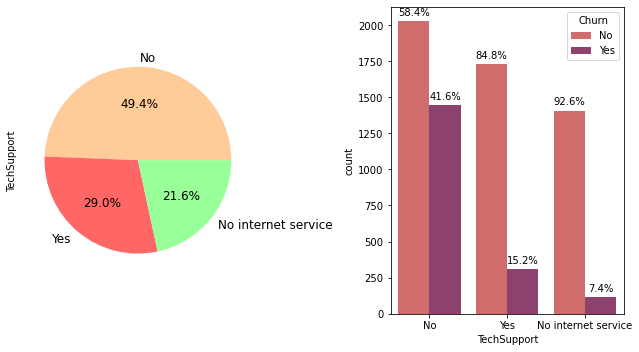

In [45]:
fig_sub_pie(df, 'TechSupport')

half of customer has no tech support and 41,6% of customer with no tech support churned. this comparision is so big compared to customer with tech support with only 15,2& churn rate

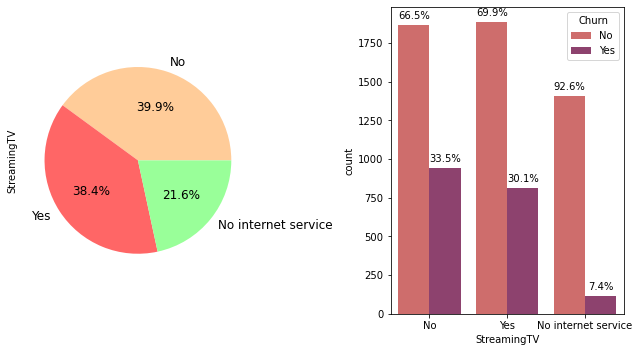

In [46]:
fig_sub_pie(df, 'StreamingTV')

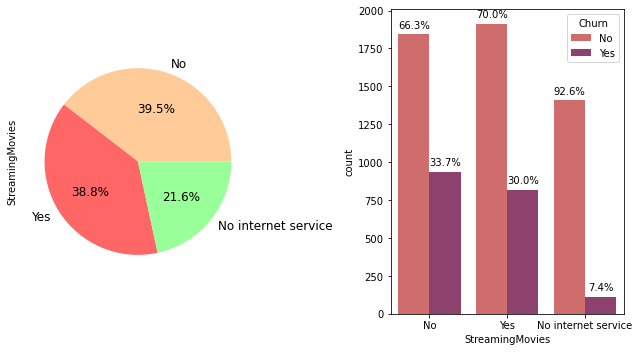

In [47]:
fig_sub_pie(df, 'StreamingMovies')


# Analysis on payment (Contract, PaperlessBilling, PaymentMethod)

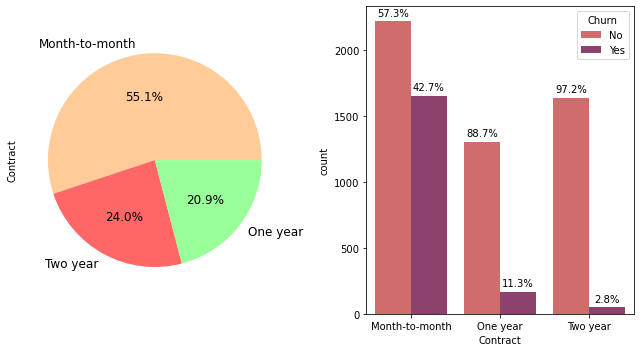

In [48]:
fig_sub_pie(df, 'Contract')

month-to-month contract being a majority, and with the highest churn rate od 42,7% meanwhile one year contract has 11.3% churn rate and two year only 2,8% churn rate. this show loyal customer tend to make contract with longer period.

# lets see how contract relationship with tenure

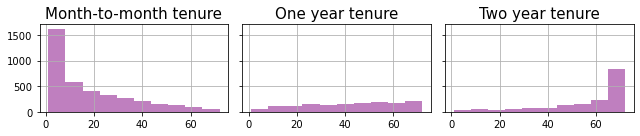

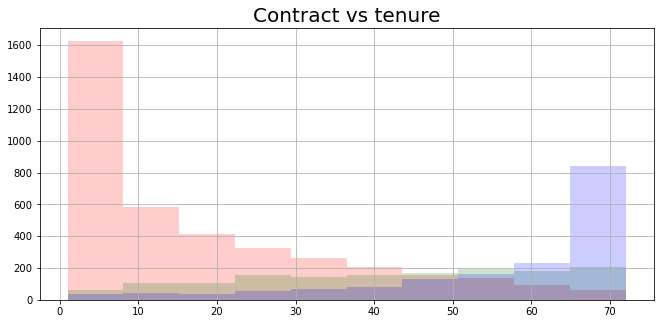

In [49]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(9, 2))
fig.set_facecolor('white')
(df[df['Contract'] == 'Month-to-month']['tenure']).hist(bins=10, density=False, alpha=0.5, color='purple', ax=ax[0])
(df[df['Contract'] == 'One year']['tenure']).hist(bins=10, density=False, alpha=0.5, color='purple', ax=ax[1])
(df[df['Contract'] == 'Two year']['tenure']).hist(bins=10, density=False, alpha=0.5, color='purple', ax=ax[2])
ax[0].set_title('Month-to-month tenure', fontsize=15)
ax[1].set_title('One year tenure', fontsize=15)
ax[2].set_title('Two year tenure', fontsize=15)
plt.tight_layout()
plt.show()

axs = plt.figure(figsize=(11,5))
axs = (df[df['Contract'] == 'Month-to-month']['tenure']).hist(bins=10, density=False, alpha=0.2, color='red')
axs = (df[df['Contract'] == 'One year']['tenure']).hist(bins=10, density=False, alpha=0.2, color='green')
axs = (df[df['Contract'] == 'Two year']['tenure']).hist(bins=10, density=False, alpha=0.2, color='blue')
axs.set_title('Contract vs tenure', fontsize=20)
plt.show()

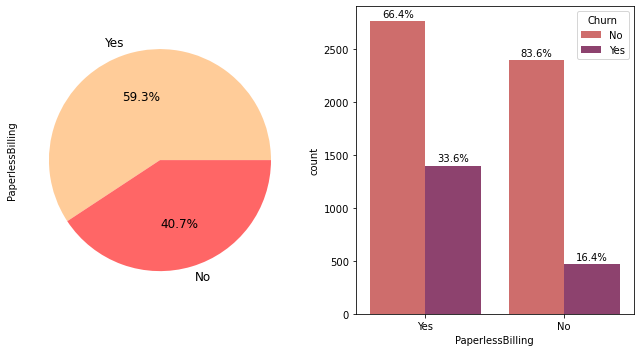

In [50]:
fig_sub_pie(df, 'PaperlessBilling')

majority user used paperless billing, but have slightly more churn rate too.

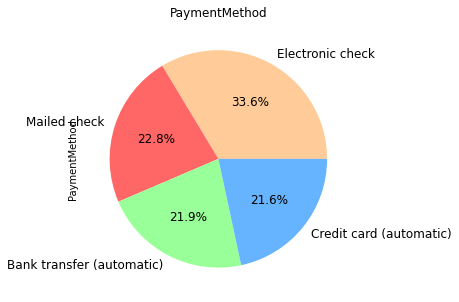

In [51]:
fig_piechart(df, 'PaymentMethod')

payment method distributed pretty well, electronic check slightly have bigger count.

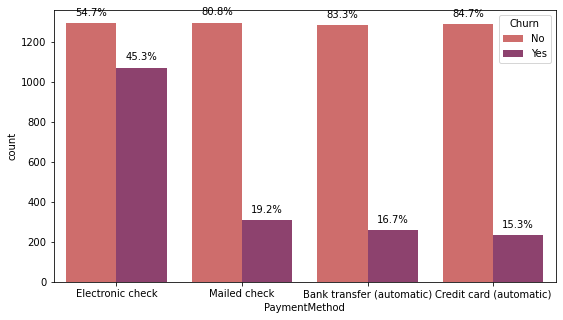

In [52]:
fig_countplot_yn(df, 'PaymentMethod')

yet being slightly larger count than other, electronic check has biggest churn rate of 45,3% while other has only under 20% churn rate.

In [53]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# CHECKING FOR OUTLIERS

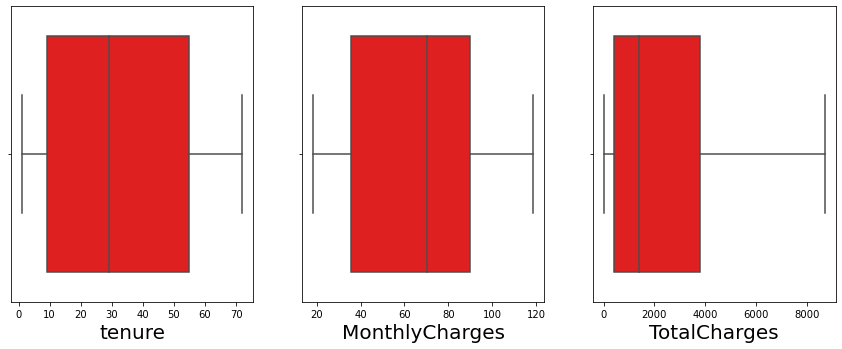

In [54]:
numerical_col=['tenure','MonthlyCharges','TotalCharges']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=3:
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


no outlier, however out of scale, lets scale it.

# Checking and removing Skewness:

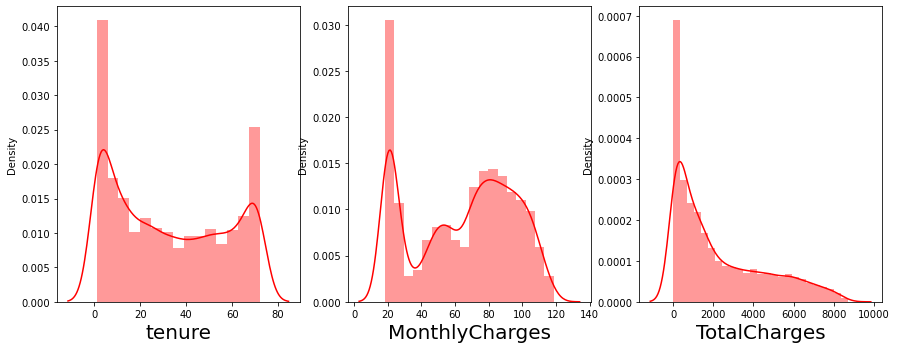

In [55]:
numerical_col=['tenure','MonthlyCharges','TotalCharges']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=3:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [56]:
df.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

# Encoding:

In [57]:
 from sklearn.preprocessing import LabelEncoder

In [58]:
lab_enc=LabelEncoder()

In [59]:
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,674,1


In [60]:
df1.shape

(7032, 20)

# Correlation using HEAT map:

In [61]:
# Checking the correlation between features and the target
cor = df1.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013929,-0.000579,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219210,0.107202,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.107482,0.342319,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.105948,0.081626,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.267182,0.871680,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.271652,0.085934,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.445006,0.463532,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.243738,-0.209762,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.044322,0.246996,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.141519,0.352453,-0.195290


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, 'gender'),
  Text(0, 1.5, 'SeniorCitizen'),
  Text(0, 2.5, 'Partner'),
  Text(0, 3.5, 'Dependents'),
  Text(0, 4.5, 'tenure'),
  Text(0, 5.5, 'PhoneService'),
  Text(0, 6.5, 'MultipleLines'),
  Text(0, 7.5, 'InternetService'),
  Text(0, 8.5, 'OnlineSecurity'),
  Text(0, 9.5, 'OnlineBackup'),
  Text(0, 10.5, 'DeviceProtection'),
  Text(0, 11.5, 'TechSupport'),
  Text(0, 12.5, 'StreamingTV'),
  Text(0, 13.5, 'StreamingMovies'),
  Text(0, 14.5, 'Contract'),
  Text(0, 15.5, 'PaperlessBilling'),
  Text(0, 16.5, 'PaymentMethod'),
  Text(0, 17.5, 'MonthlyCharges'),
  Text(0, 18.5, 'TotalCharges'),
  Text(0, 19.5, 'Churn')])

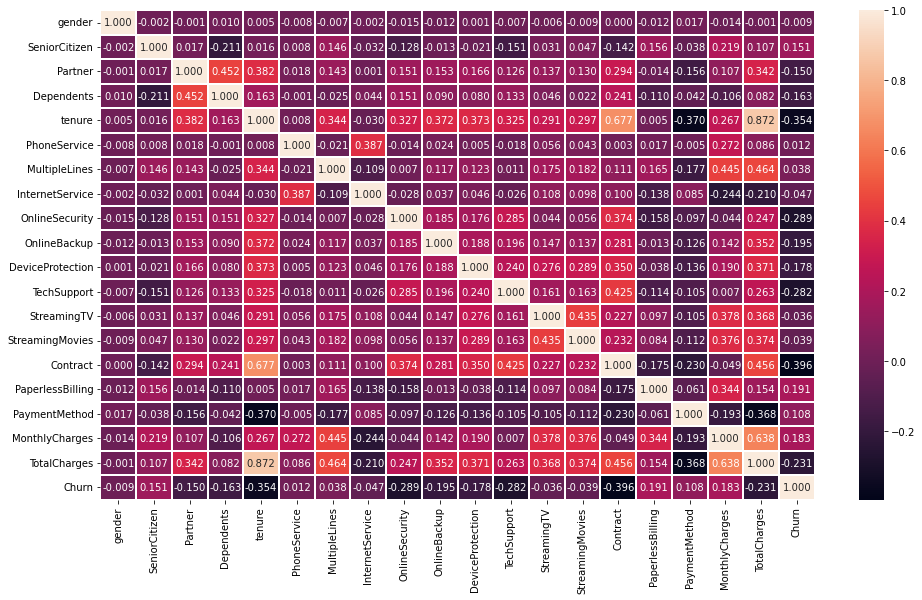

In [62]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df1.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0)

In [63]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
PaperlessBilling    0.191454
MonthlyCharges      0.182989
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.230843
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

# Visualizing the correlation between label and features using bar plot

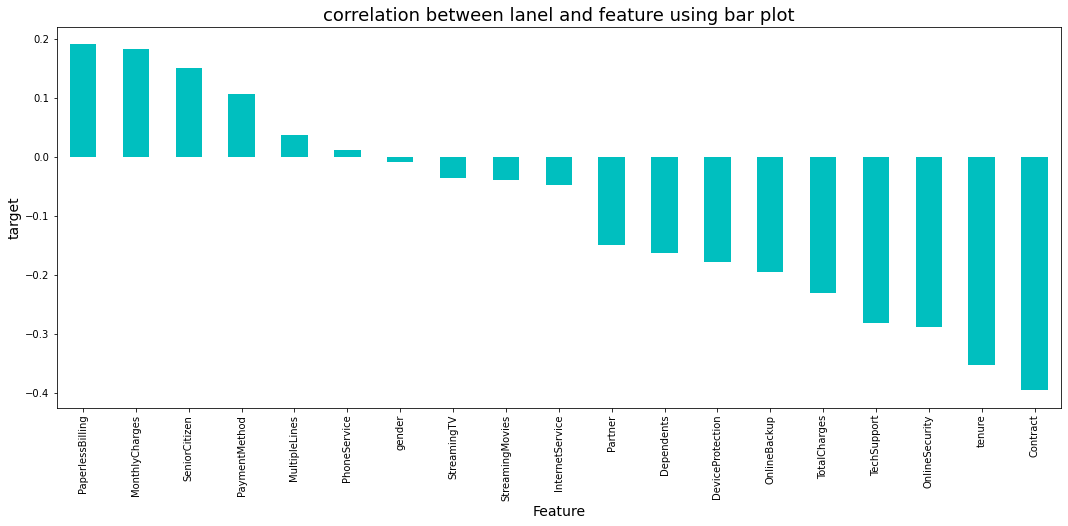

In [64]:
plt.figure(figsize=(18,7))
df1.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

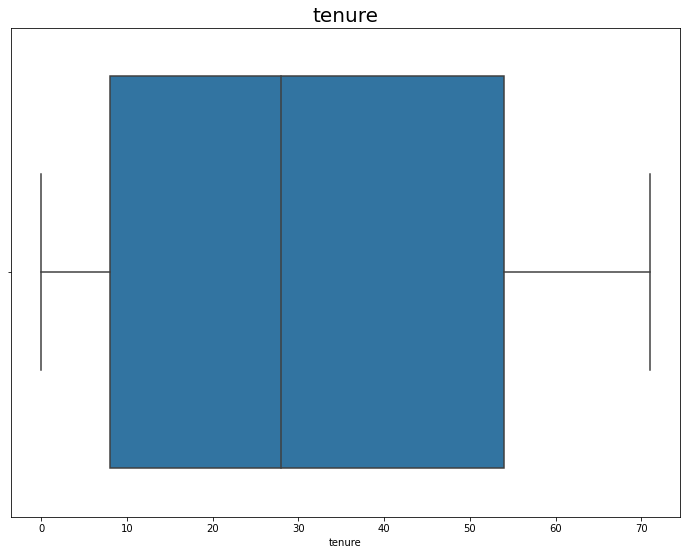

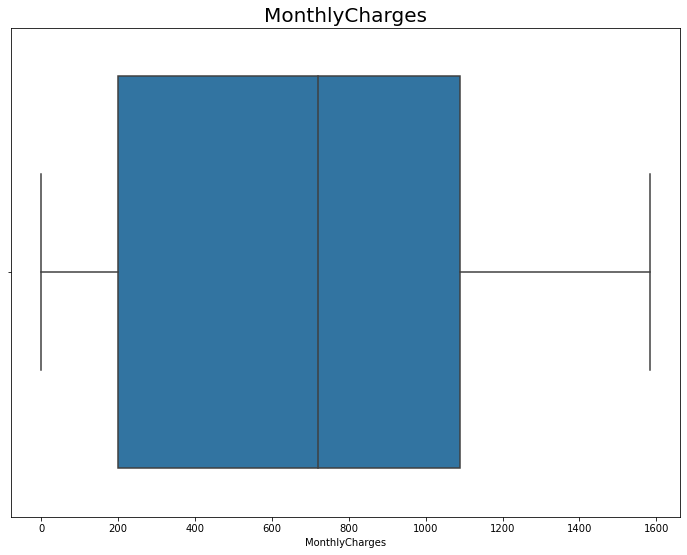

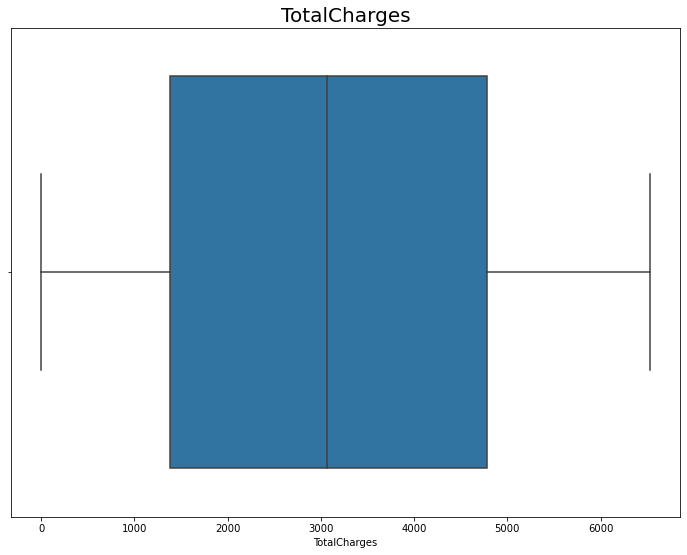

In [65]:
# check outlier on numerical feature
for col in charges:
    fig_boxplot(df1, col)

no outlier, however out of scale, lets scale it.

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[charges] = scaler.fit_transform(df1[charges])
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,1,0,0,2,0,0,0,0,0,1,2,0.089703,0.011334,0
1,1,0,0,0,0.464789,1,0,0,2,0,2,0,0,0,1,0,3,0.313961,0.555062,0
2,1,0,0,0,0.014085,1,0,0,2,2,0,0,0,0,0,1,3,0.274795,0.082095,1
3,1,0,0,0,0.619718,0,1,0,2,0,2,2,0,0,1,0,0,0.168035,0.546791,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.459886,0.103232,1


In [67]:
# handling skewness on churn
zero  = df1[df1['Churn']==0]
one = df1[df1['Churn']==1]

from sklearn.utils import resample
# upsample minority (churn yes/one)
upsample = resample(one, replace = True, n_samples = 5000) 
df1 = pd.concat([zero, upsample])

from sklearn.utils import shuffle
df1 = shuffle(df1)

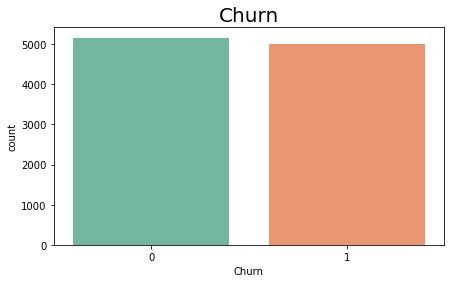

In [68]:
fig_countplot(df1, 'Churn', False)

# Dividing data in feature and Label

In [69]:
x=df1.drop(columns='Churn')#Feature
y=df1.Churn#Target

# TRAIN TEST SPLIT

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

## MODEL BUILDING

In [71]:
from sklearn import metrics
from sklearn.metrics import roc_curve

In [72]:
# list model name and accuracies
models = []
accuracies = []

In [73]:
def fig_roc_curve(model, model_name): 
    y_prob = model.predict_proba(x_test)[:,1]
    fp, tp, treshold = roc_curve(y_test, y_prob)

    fig = plt.figure(figsize=(10,9)) 
    fig.set_facecolor('white')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, label=model ,color = "r")
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name + ' ROC Curve',fontsize=16)
    plt.show()

# 1. Logistic Regression

Accuracy =  0.758609380124631 

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1519
           1       0.75      0.79      0.77      1530

    accuracy                           0.76      3049
   macro avg       0.76      0.76      0.76      3049
weighted avg       0.76      0.76      0.76      3049

Confusion Matrix: 
 [[1109  410]
 [ 326 1204]]


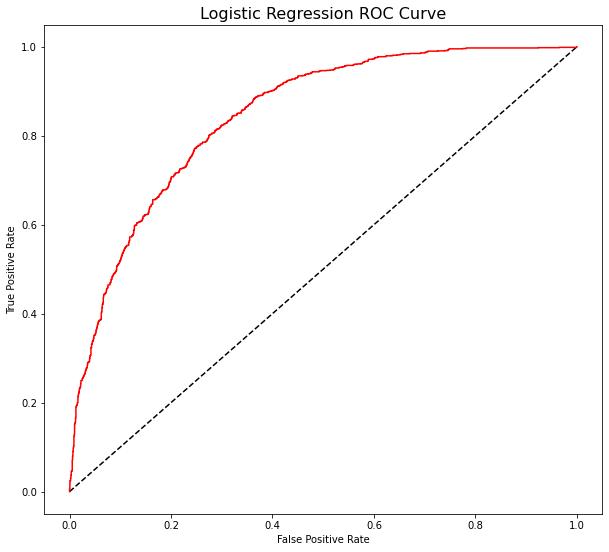

In [74]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
model = logreg.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Logistic Regression'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# 2. Decision Tree

Accuracy =  0.859954083306002 

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1519
           1       0.82      0.92      0.87      1530

    accuracy                           0.86      3049
   macro avg       0.86      0.86      0.86      3049
weighted avg       0.86      0.86      0.86      3049

Confusion Matrix: 
 [[1222  297]
 [ 130 1400]]


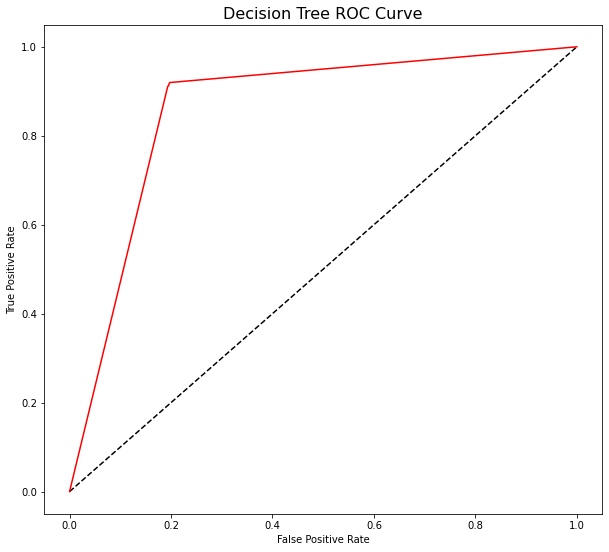

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Decision Tree'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# 3. Suport Vector Machine (SVM)

In [76]:
from sklearn import svm
svmc = svm.SVC()
model = svmc.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)

model_name = 'SVM'
models.append(model_name)
accuracies.append(acc)

Accuracy =  0.7681206953099377 

              precision    recall  f1-score   support

           0       0.80      0.72      0.75      1519
           1       0.74      0.82      0.78      1530

    accuracy                           0.77      3049
   macro avg       0.77      0.77      0.77      3049
weighted avg       0.77      0.77      0.77      3049

Confusion Matrix: 
 [[1088  431]
 [ 276 1254]]


# 4. XG Boost

Accuracy =  0.865857658248606 

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1519
           1       0.83      0.92      0.87      1530

    accuracy                           0.87      3049
   macro avg       0.87      0.87      0.87      3049
weighted avg       0.87      0.87      0.87      3049

Confusion Matrix: 
 [[1228  291]
 [ 118 1412]]


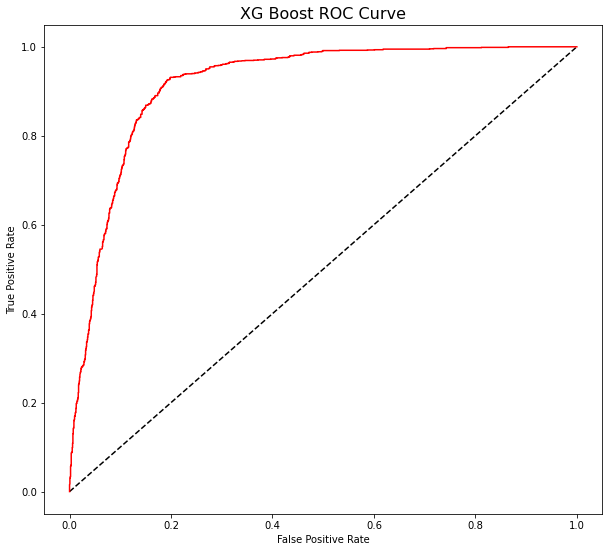

In [77]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='mlogloss')
model = xgb.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'XG Boost'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# 5. Adaboost

Accuracy =  0.7694326008527386 

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1519
           1       0.75      0.82      0.78      1530

    accuracy                           0.77      3049
   macro avg       0.77      0.77      0.77      3049
weighted avg       0.77      0.77      0.77      3049

Confusion Matrix: 
 [[1096  423]
 [ 280 1250]]


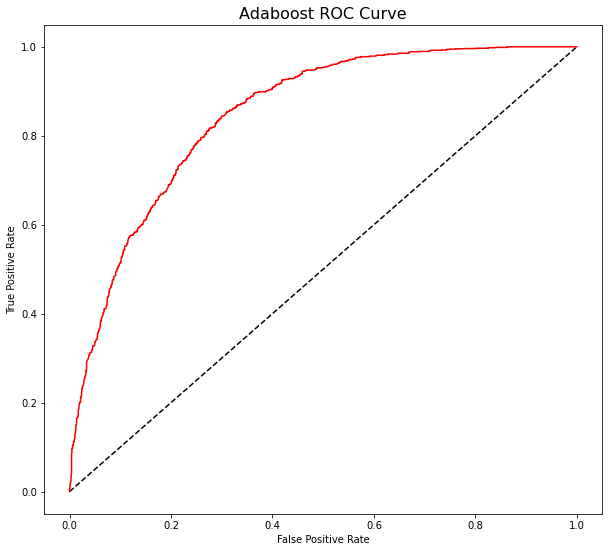

In [78]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
model = adb.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Adaboost'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# 6. Random Forest

Accuracy =  0.8848802886192194 

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1519
           1       0.85      0.93      0.89      1530

    accuracy                           0.88      3049
   macro avg       0.89      0.88      0.88      3049
weighted avg       0.89      0.88      0.88      3049

Confusion Matrix: 
 [[1273  246]
 [ 105 1425]]


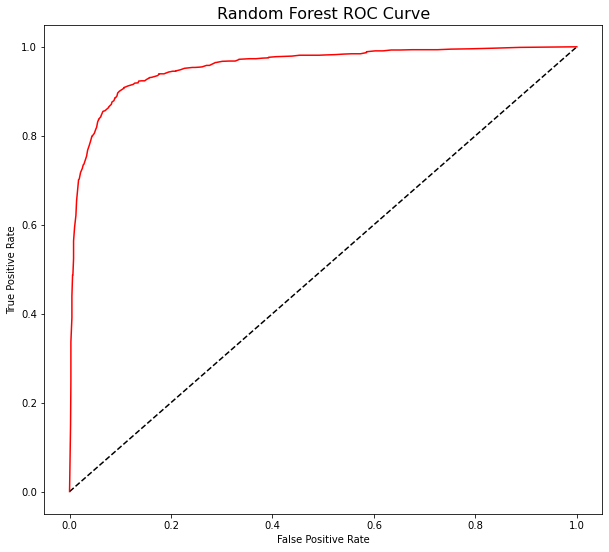

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model = rf.fit(x_train, y_train)

# predict
y_pred = model.predict(x_test)
# check accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', acc, '\n')
# classification report 
rep = metrics.classification_report(y_test, y_pred)
print(rep)
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', cm)
# roc curve
model_name = 'Random Forest'
fig_roc_curve(model, model_name)

models.append(model_name)
accuracies.append(acc)

# MODEL COMPARASION

In [80]:
df_model = pd.DataFrame(list(zip(models, accuracies)), columns=['model', 'acc'])
df_model = df_model.sort_values(by='acc', ascending=False)

In [81]:
print(df_model)

                 model       acc
5        Random Forest  0.884880
3             XG Boost  0.865858
1        Decision Tree  0.859954
4             Adaboost  0.769433
2                  SVM  0.768121
0  Logistic Regression  0.758609


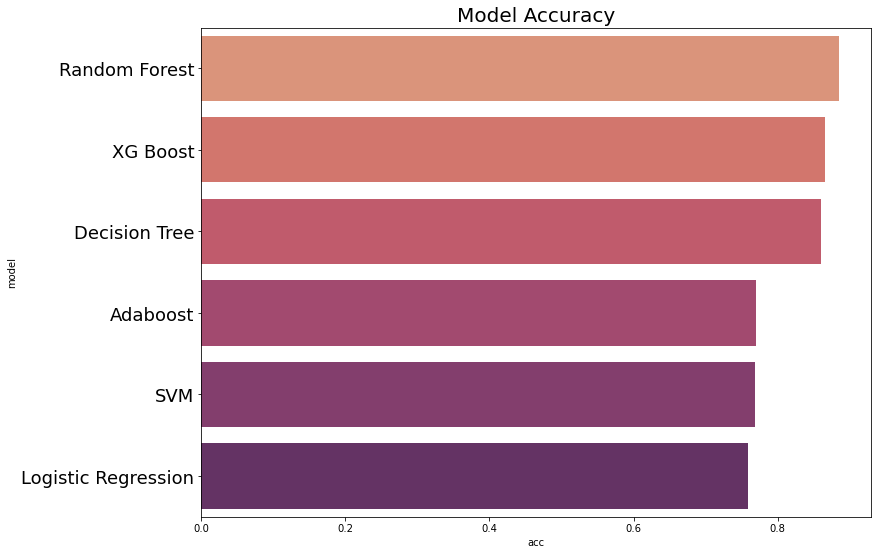

In [82]:
fig = plt.figure(figsize=(12,9))
fig.set_facecolor('white')
ax = sns.barplot(data=df_model, x='acc', y='model', palette='flare')
ax.set_title('Model Accuracy', fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=18)
plt.show()

# highest accuracy by Random forest with 88% and lowest by Logistic Regression with 75%

# Do Hyperparameter Tuning

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),
    'min_samples_leaf':range(2,6),
    'min_samples_split':range(3,8),
    'max_leaf_nodes':range(5,10)}

In [85]:
grid_search=GridSearchCV(estimator=rf,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)

In [86]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [87]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 9, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [100]:
cnn=RandomForestClassifier(criterion='entropy',max_depth=11,max_leaf_nodes=9,min_samples_split= 3)

In [101]:
#Train the model
cnn.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_leaf_nodes=9,
                       min_samples_split=3)

In [102]:
cnn.score(x_train,y_train)

0.7630025302220973

In [103]:
cnn.score(x_test,y_test)

0.7579534273532306

# CONCLUSION

# Lets Save Our Model

In [104]:
import pickle
filename='Customerchurn.'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [105]:
loaded_model=pickle.load(open('Customerchurn','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

88.48802886192195


In [106]:
# batch  No - ds0522
# Data Trained